In [66]:
import sys
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression

In [2]:
train = pd.read_csv('train.csv')
validation = pd.read_csv('validation.csv')
test = pd.read_csv('test.csv')

data = {"train":train, "valid":validation, "test":test}

In [3]:
def const(bid):
    price = bid
    return price

def rand(upper):
    price = int(random.random() * upper)
    return price

def mcpc(ecpc, pctr):
    price = int(ecpc * pctr)
    return price

def lin(pctr, basectr, basebid):
#     price = int(pctr*pctr/ basectr *basebid)
    price = int(pctr/basectr*basebid)
    return price

def win(payprice, price):
    result = (price> payprice)
    return result

In [4]:
import random
random.seed(10)

In [5]:
final_result = []
for i in range(301):
    const_bidwin = []
    bidwin = []
    budget = 6250*1000
    cost = 0
    for index in range(len(validation)):

        bidid = validation.bidid[index]
        slotprice = validation.slotprice[index]
        bidprice = validation.bidprice[index]
        payprice = validation.payprice[index]
        click = validation.click[index]
        

        price = const(i+1)
        result = win(payprice, price)

        if result and budget-payprice>0:
            detail = []
            budget = budget-payprice
            #index, adid, click, pclick
            detail = [index,bidid,click]
            const_bidwin.append(detail)
            cost = cost + payprice
        if budget<1:
            break

        slotprice = 0
        bidprice = 0
        
    c_sum = 0
    for n in range(len(const_bidwin)):
        c_sum = const_bidwin[n][2]+c_sum
    if len(const_bidwin) ==0:
        ctr=0
    else:
        ctr=c_sum/len(const_bidwin)
    detail2 = [price,len(const_bidwin),c_sum,ctr]
    final_result.append(detail2)
    print('bidprice:',price,'num of win:',len(const_bidwin),'num of click:',c_sum,'ctr:',ctr)

bidprice: 1 num of win: 82 num of click: 0 ctr: 0.0
bidprice: 2 num of win: 373 num of click: 0 ctr: 0.0
bidprice: 3 num of win: 851 num of click: 0 ctr: 0.0
bidprice: 4 num of win: 943 num of click: 0 ctr: 0.0
bidprice: 5 num of win: 2176 num of click: 0 ctr: 0.0
bidprice: 6 num of win: 7833 num of click: 0 ctr: 0.0
bidprice: 7 num of win: 9624 num of click: 4 ctr: 0.00041562759767248546
bidprice: 8 num of win: 11103 num of click: 4 ctr: 0.00036026299198414844
bidprice: 9 num of win: 12373 num of click: 4 ctr: 0.0003232845712438374
bidprice: 10 num of win: 13708 num of click: 4 ctr: 0.0002918004085205719
bidprice: 11 num of win: 16434 num of click: 4 ctr: 0.00024339783375927954
bidprice: 12 num of win: 18543 num of click: 4 ctr: 0.00021571482500134823
bidprice: 13 num of win: 20368 num of click: 5 ctr: 0.00024548311076197957
bidprice: 14 num of win: 21871 num of click: 5 ctr: 0.0002286132321338759
bidprice: 15 num of win: 23489 num of click: 5 ctr: 0.00021286559666226743
bidprice: 16 

bidprice: 111 num of win: 126202 num of click: 61 ctr: 0.00048335208633777595
bidprice: 112 num of win: 125832 num of click: 60 ctr: 0.0004768262445164982
bidprice: 113 num of win: 125349 num of click: 60 ctr: 0.00047866357130890556
bidprice: 114 num of win: 124951 num of click: 59 ctr: 0.00047218509655785066
bidprice: 115 num of win: 124637 num of click: 59 ctr: 0.000473374680070926
bidprice: 116 num of win: 124252 num of click: 59 ctr: 0.00047484145124424557
bidprice: 117 num of win: 124053 num of click: 58 ctr: 0.0004675420989415814
bidprice: 118 num of win: 123682 num of click: 59 ctr: 0.00047702980223476334
bidprice: 119 num of win: 123319 num of click: 59 ctr: 0.00047843398016526244
bidprice: 120 num of win: 122524 num of click: 59 ctr: 0.0004815383108615455
bidprice: 121 num of win: 122201 num of click: 59 ctr: 0.0004828111062920925
bidprice: 122 num of win: 121609 num of click: 60 ctr: 0.0004933845356840365
bidprice: 123 num of win: 121345 num of click: 60 ctr: 0.00049445795047

bidprice: 219 num of win: 91211 num of click: 59 ctr: 0.00064685180515508
bidprice: 220 num of win: 91090 num of click: 59 ctr: 0.000647711055000549
bidprice: 221 num of win: 90856 num of click: 59 ctr: 0.0006493792374746853
bidprice: 222 num of win: 90523 num of click: 59 ctr: 0.0006517680589463451
bidprice: 223 num of win: 90402 num of click: 58 ctr: 0.0006415787261343775
bidprice: 224 num of win: 90259 num of click: 58 ctr: 0.0006425951982627771
bidprice: 225 num of win: 90169 num of click: 58 ctr: 0.0006432365890716321
bidprice: 226 num of win: 89579 num of click: 57 ctr: 0.000636309849406669
bidprice: 227 num of win: 89246 num of click: 57 ctr: 0.000638684086681756
bidprice: 228 num of win: 89059 num of click: 56 ctr: 0.0006287966404293783
bidprice: 229 num of win: 88922 num of click: 56 ctr: 0.000629765412383887
bidprice: 230 num of win: 88797 num of click: 56 ctr: 0.0006306519364392941
bidprice: 231 num of win: 88697 num of click: 56 ctr: 0.0006313629547786283
bidprice: 232 num 

In [15]:
x = []
y = []
for i in range(len(final_result)):
    x.append(final_result[i][0])
for j in range(len(final_result)):
    y.append(final_result[j][2])

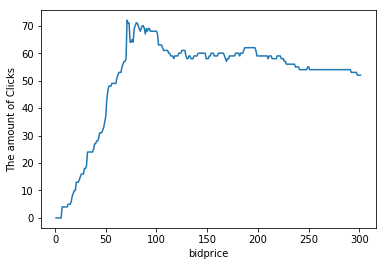

In [21]:
plt.plot(x,y)
plt.xlabel('bidprice')
plt.ylabel('The amount of Clicks')
plt.rcParams['savefig.dpi'] = 300
plt.savefig('1.png')

In [22]:

def simulate_random_bid(bid, print_output=True):
        # create df with all impressions
    
    # keep running total of ad spend, impressions, clicks
    ad_spend = 0
    impressions = 0
    clicks = 0

    # for each impression in the log
    for index, value in validation.iterrows():
        # grab the attributes of the impression (drop clicks)
        attributes = value

        # calculate the impression utility
        imp_utility = bid

            # calculate the minimum utility needed
        min_utility = 0
        adjusted_utility = imp_utility - min_utility

            # calculate the bid price
        bid_price = adjusted_utility

            # find the paying price
        paying_price = int(value['payprice'])

        # if bid_price > paying_price, update campaign metrics
        if bid_price >= paying_price:
            impressions += 1
            ad_spend += paying_price/1000.0
            if value['click'] == 1:
                clicks += 1

    try:
        cpm = float(ad_spend) / (impressions) * 1000
        ctr = float(clicks) / impressions
    except ZeroDivisionError:
        cpm = 0.0
        ctr = 0.0
    try:
        cpc = float(ad_spend) / clicks
    except ZeroDivisionError:
        cpc = 0.0

    if print_output == False:
        return ad_spend, impressions, clicks, cpm, ctr, cpc
    else:
        
        print ('Bid Price: %d ' % bid)
        print ('Total ad spend: %.2f Fen' % ad_spend)
        print ('Number of impressions delivered: %d' % impressions)
        print ('Number of clicks: %d' % clicks)
        print ('eCPM: %.2f Fen' % cpm)
        print ('CTR: %0.2f %%' % (ctr*100))
        print ('CPC: %.2f Fen' % cpc)

In [30]:
a=np.random.uniform(35,70)
print(a)
simulate_random_bid(a)

58.371319029417
Bid Price: 58 
Total ad spend: 4300.50 Fen
Number of impressions delivered: 136840
Number of clicks: 49
eCPM: 31.43 Fen
CTR: 0.04 %
CPC: 87.77 Fen


In [41]:
from itertools import product

In [60]:
interval = [(35,45),(45,55),(55,65),(65,75),(75,85),(85,95),(95,105),(105,115),(115,125),(125,135)]
# a = []
# for i in l:
#     a.append(np.random.uniform(35,i))

In [61]:
interval

[(35, 45),
 (45, 55),
 (55, 65),
 (65, 75),
 (75, 85),
 (85, 95),
 (95, 105),
 (105, 115),
 (115, 125),
 (125, 135)]

In [62]:
a = []
for i in range(len(interval)):
    a.append(np.random.uniform(interval[i][0],interval[i][1]))

In [63]:
a

[42.575626027254984,
 47.163150640190395,
 59.091346475151056,
 65.24551567506896,
 84.60045674309518,
 91.98710511978936,
 103.94001929406647,
 106.56141082021722,
 115.47953330481644,
 127.8678686256212]

In [64]:
result = []
for i in a:
    result.append(simulate_random_bid(i))

Bid Price: 42 
Total ad spend: 1977.61 Fen
Number of impressions delivered: 91302
Number of clicks: 29
eCPM: 21.66 Fen
CTR: 0.03 %
CPC: 68.19 Fen
Bid Price: 47 
Total ad spend: 2314.82 Fen
Number of impressions delivered: 98779
Number of clicks: 33
eCPM: 23.43 Fen
CTR: 0.03 %
CPC: 70.15 Fen
Bid Price: 59 
Total ad spend: 4418.27 Fen
Number of impressions delivered: 138836
Number of clicks: 49
eCPM: 31.82 Fen
CTR: 0.04 %
CPC: 90.17 Fen
Bid Price: 65 
Total ad spend: 4970.85 Fen
Number of impressions delivered: 147723
Number of clicks: 55
eCPM: 33.65 Fen
CTR: 0.04 %
CPC: 90.38 Fen
Bid Price: 84 
Total ad spend: 9581.72 Fen
Number of impressions delivered: 209552
Number of clicks: 110
eCPM: 45.72 Fen
CTR: 0.05 %
CPC: 87.11 Fen
Bid Price: 91 
Total ad spend: 10705.33 Fen
Number of impressions delivered: 222311
Number of clicks: 123
eCPM: 48.15 Fen
CTR: 0.06 %
CPC: 87.04 Fen
Bid Price: 103 
Total ad spend: 11789.44 Fen
Number of impressions delivered: 233367
Number of clicks: 128
eCPM: 50.5

In [101]:
random1 = []
for i in range(50):
    random1.append(np.random.uniform(20,30))

In [147]:
final_result1 = []
for i in range(len(random3)):
    const_bidwin = []
    bidwin = []
    budget = 6250*1000
    cost = 0
    bidprice = random3
    price = random3[i]
    for index in range(len(validation)):

        bidid = validation.bidid[index]
        slotprice = validation.slotprice[index]
        if validation.payprice[index] > np.sort(random3)[-2]:
            payprice = validation.payprice[index]
        else:
            payprice = np.sort(random3)[-2]
        click = validation.click[index]
        
        
        result = win(payprice, price)
        if result and budget-payprice>0:
            detail = []
            budget = budget-payprice
            #index, adid, click, pclick
            detail = [index,bidid,click]
            const_bidwin.append(detail)
            cost = cost + payprice
        if budget<1:
            break

        slotprice = 0
        bidprice = 0
        
    c_sum = 0
    for n in range(len(const_bidwin)):
        c_sum = const_bidwin[n][2]+c_sum
    if len(const_bidwin) ==0:
        ctr=0
    else:
        ctr=c_sum/len(const_bidwin)
    detail2 = [price,len(const_bidwin),c_sum,ctr]
    final_result1.append(detail2)
    print('bidprice:',price,'num of win:',len(const_bidwin),'num of click:',c_sum,'ctr:',ctr)

bidprice: 44.911452349323085 num of win: 0 num of click: 0 ctr: 0


KeyboardInterrupt: 

In [108]:
data1 = pd.DataFrame(final_result1)

In [111]:
np.sort(data1[0])[-2]

29.81046398245072

In [112]:
validation['new_payprice'] = np.sort(data1[0])[-2]

In [113]:
validation

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,bidprice,payprice,keypage,advertiser,usertag,size,OS,browser,slotpricebucket,new_payprice
0,0,4,20,bbcb813b6166538503d8b33a5602d7d72f6019dc,663169f66491c98c69f1f94a5c48fa34aa9fe06f,windows_ie,211.144.203.*,79,79,1.0,...,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111",96000,windows,ie,1,29.810464
1,0,1,21,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,a23f0cfab6592c137f796e68fa752fceba08bb1b,windows_chrome,58.247.250.*,79,79,1.0,...,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110",85500,windows,chrome,1,29.810464
2,0,4,8,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,5105a013ea54a9706146033e6a138d5234a3803e,windows_ie,117.12.111.*,2,2,2.0,...,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111",75000,windows,ie,1,29.810464
3,0,5,15,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,577e9a768ce17e73c61ba7022db927f9ee761830,windows_chrome,61.187.224.*,201,205,2.0,...,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110",94080,windows,chrome,1,29.810464
4,0,1,18,0899bf144249458ea9c89188473694bf44c7ca15,e4bf79c562745d671b19f2edf7fda89c2e25987f,windows_chrome,117.41.145.*,134,135,2.0,...,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110",40000,windows,chrome,1,29.810464


In [118]:
budget = 6250*1000
cost = 0
bidprice = np.sort(data1[0])[-1]
price = np.sort(data1[0])[-2]
for index in range(len(validation)):

    bidid = validation.bidid[index]
    slotprice = validation.slotprice[index]
    
    click = validation.click[index]
    if validation.payprice[index] > np.sort(data1[0])[-2]:
        payprice = validation.payprice[index]
    else:
        payprice = np.sort(data1[0])[-2]
        
    result = win(payprice, price)
    if result and budget-payprice>0:
        detail = []
        budget = budget-payprice
        #index, adid, click, pclick
        detail = [index,bidid,click]
        const_bidwin.append(detail)
        cost = cost + payprice
    if budget<1:
        break

    slotprice = 0
    bidprice = 0
        
    c_sum = 0
    for n in range(len(const_bidwin)):
        c_sum = const_bidwin[n][2]+c_sum
    if len(const_bidwin) ==0:
        ctr=0
    else:
        ctr=c_sum/len(const_bidwin)
    detail2 = [price,len(const_bidwin),c_sum,ctr]
    print('bidprice:',price,'num of win:',len(const_bidwin),'num of click:',c_sum,'ctr:',ctr)

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 29.81046398245072 num of win: 81778 num of click: 22 ctr: 0.0002690210080950867
bidprice: 

KeyboardInterrupt: 

In [127]:
random2 = []
for i in range(50):
    random2.append(np.random.uniform(30,40))

In [139]:
budget = 6250*1000
cost = 0
bidprice = np.sort(random2)[-1]
price = np.sort(random2)[-2]
for index in range(len(validation)):

    bidid = validation.bidid[index]
    slotprice = validation.slotprice[index]
    
    click = validation.click[index]
    if validation.payprice[index] > np.sort(random2)[-2]:
        payprice = validation.payprice[index]
    else:
        payprice = np.sort(random2)[-2]
        
    result = win(payprice, price)
    if result and budget-payprice>0:
        detail = []
        budget = budget-payprice
        #index, adid, click, pclick
        detail = [index,bidid,click]
        const_bidwin.append(detail)
        cost = cost + payprice
    if budget<1:
        break

    slotprice = 0
    bidprice = 0
        
    c_sum = 0
    for n in range(len(const_bidwin)):
        c_sum = const_bidwin[n][2]+c_sum
    if len(const_bidwin) ==0:
        ctr=0
    else:
        ctr=c_sum/len(const_bidwin)
#     detail3 = [price,len(const_bidwin),c_sum,ctr]
    print('bidprice:',price,'num of win:',len(const_bidwin),'num of click:',c_sum,'ctr:',ctr)

bidprice: 39.506082235991656 num of win: 69272 num of click: 20 ctr: 0.0002887169419101513
bidprice: 39.506082235991656 num of win: 69272 num of click: 20 ctr: 0.0002887169419101513
bidprice: 39.506082235991656 num of win: 69272 num of click: 20 ctr: 0.0002887169419101513
bidprice: 39.506082235991656 num of win: 69272 num of click: 20 ctr: 0.0002887169419101513
bidprice: 39.506082235991656 num of win: 69272 num of click: 20 ctr: 0.0002887169419101513
bidprice: 39.506082235991656 num of win: 69272 num of click: 20 ctr: 0.0002887169419101513
bidprice: 39.506082235991656 num of win: 69272 num of click: 20 ctr: 0.0002887169419101513
bidprice: 39.506082235991656 num of win: 69272 num of click: 20 ctr: 0.0002887169419101513
bidprice: 39.506082235991656 num of win: 69272 num of click: 20 ctr: 0.0002887169419101513
bidprice: 39.506082235991656 num of win: 69272 num of click: 20 ctr: 0.0002887169419101513
bidprice: 39.506082235991656 num of win: 69272 num of click: 20 ctr: 0.0002887169419101513

bidprice: 39.506082235991656 num of win: 69272 num of click: 20 ctr: 0.0002887169419101513
bidprice: 39.506082235991656 num of win: 69272 num of click: 20 ctr: 0.0002887169419101513
bidprice: 39.506082235991656 num of win: 69272 num of click: 20 ctr: 0.0002887169419101513
bidprice: 39.506082235991656 num of win: 69272 num of click: 20 ctr: 0.0002887169419101513
bidprice: 39.506082235991656 num of win: 69272 num of click: 20 ctr: 0.0002887169419101513
bidprice: 39.506082235991656 num of win: 69272 num of click: 20 ctr: 0.0002887169419101513
bidprice: 39.506082235991656 num of win: 69272 num of click: 20 ctr: 0.0002887169419101513
bidprice: 39.506082235991656 num of win: 69272 num of click: 20 ctr: 0.0002887169419101513
bidprice: 39.506082235991656 num of win: 69272 num of click: 20 ctr: 0.0002887169419101513
bidprice: 39.506082235991656 num of win: 69272 num of click: 20 ctr: 0.0002887169419101513
bidprice: 39.506082235991656 num of win: 69272 num of click: 20 ctr: 0.0002887169419101513

KeyboardInterrupt: 

In [133]:
random3 = []
for i in range(50):
    random3.append(np.random.uniform(40,50))

In [144]:
budget = 6250*1000
cost = 0
bidprice = np.sort(random3)[-1]
for index in range(len(validation)):

    bidid = validation.bidid[index]
    slotprice = validation.slotprice[index]
    
    click = validation.click[index]
    if validation.payprice[index] > np.sort(random3)[-2]:
        payprice = validation.payprice[index]
    else:
        payprice = np.sort(random3)[-2]
        
    result = win(payprice, price)
    if result and budget-payprice>0:
        detail = []
        budget = budget-payprice
        #index, adid, click, pclick
        detail = [index,bidid,click]
        const_bidwin.append(detail)
        cost = cost + payprice
    if budget<1:
        break

    slotprice = 0
    bidprice = 0
        
    c_sum = 0
    for n in range(len(const_bidwin)):
        c_sum = const_bidwin[n][2]+c_sum
    if len(const_bidwin) ==0:
        ctr=0
    else:
        ctr=c_sum/len(const_bidwin)
    detail2 = [price,len(const_bidwin),c_sum,ctr]
    print('bidprice:',price,'num of win:',len(const_bidwin),'num of click:',c_sum,'ctr:',ctr)

bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803

bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803

bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803

KeyboardInterrupt: 

In [142]:
validation.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,bidprice,payprice,keypage,advertiser,usertag,size,OS,browser,slotpricebucket,new_payprice
0,0,4,20,bbcb813b6166538503d8b33a5602d7d72f6019dc,663169f66491c98c69f1f94a5c48fa34aa9fe06f,windows_ie,211.144.203.*,79,79,1.0,...,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111",96000,windows,ie,1,29.810464
1,0,1,21,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,a23f0cfab6592c137f796e68fa752fceba08bb1b,windows_chrome,58.247.250.*,79,79,1.0,...,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110",85500,windows,chrome,1,29.810464
2,0,4,8,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,5105a013ea54a9706146033e6a138d5234a3803e,windows_ie,117.12.111.*,2,2,2.0,...,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111",75000,windows,ie,1,29.810464
3,0,5,15,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,577e9a768ce17e73c61ba7022db927f9ee761830,windows_chrome,61.187.224.*,201,205,2.0,...,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110",94080,windows,chrome,1,29.810464
4,0,1,18,0899bf144249458ea9c89188473694bf44c7ca15,e4bf79c562745d671b19f2edf7fda89c2e25987f,windows_chrome,117.41.145.*,134,135,2.0,...,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110",40000,windows,chrome,1,29.810464


In [135]:
random4 = []
for i in range(50):
    random4.append(np.random.uniform(50,60))
random5 = []
for i in range(50):
    random5.append(np.random.uniform(60,70))
random6 = []
for i in range(50):
    random6.append(np.random.uniform(70,80))
random7 = []
for i in range(50):
    random7.append(np.random.uniform(80,90))
random8 = []
for i in range(50):
    random8.append(np.random.uniform(90,100))
random9 = []
for i in range(50):
    random9.append(np.random.uniform(100,110))
random10 = []
for i in range(50):
    random10.append(np.random.uniform(110,120))

In [145]:
budget = 6250*1000
cost = 0
bidprice = np.sort(random4)[-1]
for index in range(len(validation)):

    bidid = validation.bidid[index]
    slotprice = validation.slotprice[index]
    
    click = validation.click[index]
    if validation.payprice[index] > np.sort(random4)[-2]:
        payprice = validation.payprice[index]
    else:
        payprice = np.sort(random4)[-2]
        
    result = win(payprice, price)
    if result and budget-payprice>0:
        detail = []
        budget = budget-payprice
        #index, adid, click, pclick
        detail = [index,bidid,click]
        const_bidwin.append(detail)
        cost = cost + payprice
    if budget<1:
        break

    slotprice = 0
    bidprice = 0
        
    c_sum = 0
    for n in range(len(const_bidwin)):
        c_sum = const_bidwin[n][2]+c_sum
    if len(const_bidwin) ==0:
        ctr=0
    else:
        ctr=c_sum/len(const_bidwin)
    detail2 = [price,len(const_bidwin),c_sum,ctr]
    print('bidprice:',price,'num of win:',len(const_bidwin),'num of click:',c_sum,'ctr:',ctr)

bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803

bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803

bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803
bidprice: 49.774753443884734 num of win: 69408 num of click: 20 ctr: 0.0002881512217611803

KeyboardInterrupt: 

In [159]:
budget = 6250*1000
spend = 0
num_click = 0
bidprice = np.sort(random4)[-1]
for i in range(validation.shape[0]):
    bid = bidprice
    if validation.payprice[i] > np.sort(random4)[-2]:
        payprice = validation.payprice[i]
    else:
        payprice = np.sort(random4)[-2]        
    if bid >= payprice:
        spend = spend + payprice
        if spend > 6250000:
            spend=spend-payprice
            
            break
        num_click = num_click + validation.click[i]
        
print(num_click)    

36


In [163]:
budget = 6250*1000
spend = 0
num_click = 0
bidprice = np.sort(random5)[-1]
for i in range(train.shape[0]):
    bid = bidprice
    if train.payprice[i] > np.sort(random5)[-2]:
        payprice = train.payprice[i]
    else:
        payprice = np.sort(random5)[-2]        
    if bid >= payprice:
        spend = spend + payprice
        if spend > 6250000:
            spend=spend-payprice
            
            break
        num_click = num_click + train.click[i]
        
print(num_click)   

39


In [164]:
budget = 6250*1000
spend = 0
num_click = 0
bidprice = np.sort(random6)[-1]
for i in range(train.shape[0]):
    bid = bidprice
    if train.payprice[i] > np.sort(random6)[-2]:
        payprice = train.payprice[i]
    else:
        payprice = np.sort(random6)[-2]        
    if bid >= payprice:
        spend = spend + payprice
        if spend > 6250000:
            spend=spend-payprice
            
            break
        num_click = num_click + train.click[i]
        
print(num_click)   

41


In [165]:
budget = 6250*1000
spend = 0
num_click = 0
bidprice = np.sort(random7)[-1]
for i in range(train.shape[0]):
    bid = bidprice
    if train.payprice[i] > np.sort(random7)[-2]:
        payprice = train.payprice[i]
    else:
        payprice = np.sort(random7)[-2]        
    if bid >= payprice:
        spend = spend + payprice
        if spend > 6250000:
            spend=spend-payprice
            
            break
        num_click = num_click + train.click[i]
        
print(num_click)   

33


In [166]:
budget = 6250*1000
spend = 0
num_click = 0
bidprice = np.sort(random8)[-1]
for i in range(train.shape[0]):
    bid = bidprice
    if train.payprice[i] > np.sort(random8)[-2]:
        payprice = train.payprice[i]
    else:
        payprice = np.sort(random8)[-2]        
    if bid >= payprice:
        spend = spend + payprice
        if spend > 6250000:
            spend=spend-payprice
            
            break
        num_click = num_click + train.click[i]
        
print(num_click)   

31
